# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [37]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.stats.weightstats as weightstats
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.

## Q1: Is the distribution of body temperatures normal?

In [38]:
print(df.shape)
print('Max temp: {}, \nMin temp: {}'.format(df.temperature.max(),df.temperature.min()))
df.head()

(130, 3)
Max temp: 100.8, 
Min temp: 96.3


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


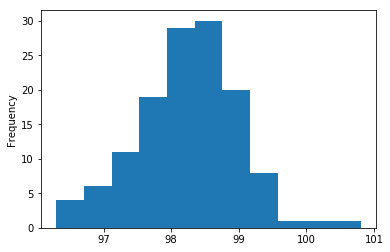

In [4]:
# Plotting a simple histogram
df.temperature.plot(kind='hist', bins=11)
plt.show()

In [5]:
df[['temperature']].describe()

,temperature
count,130.000000
mean,98.249231
std,0.733183
min,96.300000
25%,97.800000
50%,98.300000
75%,98.700000
max,100.800000


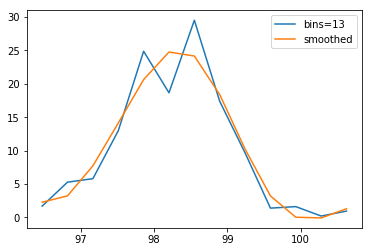

In [6]:
# using scipy interpolate with a univariateSpline
from scipy.interpolate import UnivariateSpline

d = df.temperature
n = 13
p,x = np.histogram(d,bins=n)            
x = x[:-1] + (x[1] - x[0])/2            # convert bin edges to centers
f = UnivariateSpline(x, p, s=n)
plt.plot(x, f(x), label='bins={}'.format(n))
g = UnivariateSpline(x, p, s=len(d))
plt.plot(x, g(x), label='smoothed')
plt.legend(loc='upper right')
plt.show()

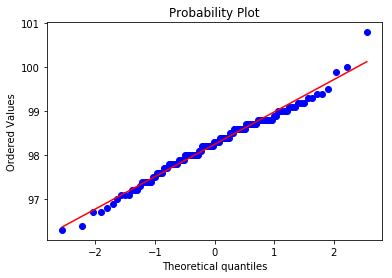

In [7]:
# using stats' probability plot (very similar to a Q-Q plot, 
# (a probability plot compares a sample vs a theoretical distribution. A qq plot compares two samples.)
from scipy import stats
d = df.temperature
fig, ax = plt.subplots()
res = stats.probplot(d, plot=ax)
plt.show()

In [8]:
# Using SciPy's normal test https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html
k2,p = stats.mstats.normaltest(d)
# How to interpret: https://stackoverflow.com/a/12839537/1215012
print('Statistics=%.3f, p=%.3f' % (k2, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=2.704, p=0.259
Sample looks Gaussian (fail to reject H0)


In [9]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

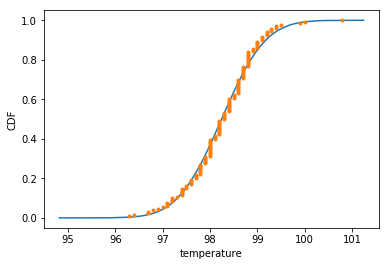

In [10]:
temp = df.temperature
x,y = ecdf(temp)
mu, std = np.mean(temp), np.std(temp)
samples = np.random.normal(mu, std, size=100000)
x_theor, y_theor = ecdf(samples)

_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('temperature')
_ = plt.ylabel('CDF')
plt.show()

The temperature data is approximately normal in distribution.
You can see this with a histogram plot with 11 bins.
The second graph shows the fully smoothed data plotted against data grouped into 13 bins.
The probability plot shows the temperature data transformed and plotted against the fitted normal line - it shows a good match.
The normal test uses the D'Agostino's K^2 Test and is returning a p-value of 0.2587 so there is a 26% chance that we would get a chi-squared statistic that large (or larger) if our data were taken from a perfectly normal distribution. We can be confident with a statistical significance of 95% that the temperature data is from a normal distribution.

## Q2: Is the sample size large? Are the observations independent?

In [11]:
print(df.shape)

(130, 3)


There are 130 sample points, this is greater than 30 so for many statistical purposes counts as large.

It is also considerably less than 10% of the total human population therefore can be treated as an independent sample of individuals. The data also come from scientific papers that set out to look at a random sample of humans so we can assume both independence and randomness in the sample collection techniques used.

## Q3: Is the true population mean really 98.6 degrees F?

In [12]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


### Via a hacked normal statistics hypothesis test
Here I create multiple true normal distribution via a random generator, setting the mean to the value we want to test and the standard deviation to what we see in our sample. I then randomly sample this and compare

Steps:
1. State hypothesis.
2. Set the significance level.
3. Choose the test statistic.
4. Find the observed value of the test statistic.
5. Find the p-value
    1. re-sample the observed data with replacement many times to create bootstrapped samples
    2. calculating mean for each bootstrapped sample, sample size match observed data
    3. plot the generated samples mean
6. Calculate how many of the samples have a mean of 98.2 or further into the tail to estimate p-value

**The hypothesis**
* H0 (null) '$98.6\deg^F$ is the true mean temperature of the population'
* Ha (alternate) 'The true mean of the temperature of the population is more or less than $98.6 \deg^F$'

Significance level: 5%

Test statistic: We're looking at average temperature so we'll use mean.

Observed value of test statistic: from describe() above mean of our data is = $98.2\deg^F$

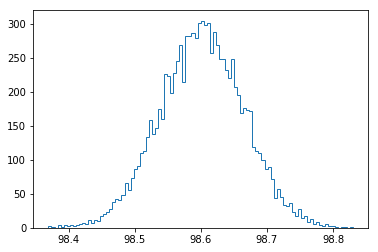

98.24923076923078 98.6


In [13]:
temp = df.temperature
mu = np.mean(temp)
muh0 = 98.6

temp_shifted = df.temperature - mu + muh0
size = 10000

created_means = np.empty(size)
for i in range(size):
    created_means[i] = np.mean(np.random.choice(temp_shifted, size=len(temp_shifted)))
    
_ = plt.hist(created_means, bins=100, histtype='step')
#_ = plt.hist(temp, bins=100, histtype='step')      # to view the raw data
plt.show()
print(mu, muh0)

In [14]:
# Compute and print SEM (standard Error of the Mean) of the main data sample
sem = np.std(temp) / np.sqrt(len(temp))
print('Standard error of the mean: {:.7f}'.format(sem))

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(created_means)
print('Standard diviation of the means of all the replicates: {:.7f}'.format(bs_std))

# calculating the probablity of getting a mean of 98.2
p = np.sum(np.array(created_means)<=98.2)/len(created_means)
print('Bootstrapped statistics P-value is {:.07f}'.format(p))
# interpret
alpha = 0.05
if p > alpha:
    print("Sample indicates that the true population's mean could be 98.6 (fail to reject H0)")
else:
    print("Sample does not indicate that the true population's mean could be 98.6 (reject H0)")

Standard error of the mean: 0.0640566
Standard diviation of the means of all the replicates: 0.0638959
Bootstrapped statistics P-value is 0.0000000
Sample does not indicate that the true population's mean could be 98.6 (reject H0)


In [15]:
test_value = 98.2
print('The actual number of samples where the mean came out to be {} degF or less was {}'.format(
    test_value, np.sum(np.array(created_means)<=test_value)))
print('The actual number of samples where the mean came out to be {} degF or less was {}'.format(
    test_value+0.1, np.sum(np.array(created_means)<=test_value+0.1)))
print('The actual number of samples where the mean came out to be {} degF or less was {}'.format(
    test_value+0.2, np.sum(np.array(created_means)<=test_value+0.2)))

The actual number of samples where the mean came out to be 98.2 degF or less was 0
The actual number of samples where the mean came out to be 98.3 degF or less was 0
The actual number of samples where the mean came out to be 98.4 degF or less was 15


### Now, with a Frequentist statistical test. (First 't' test)

**Would you use a one-sample or two-sample test?**</br>
As we have one sample of data I'll be running a one sample test, however I have defined Ha as the true mean temperature could be higher or lower than 98.6\deg^F$' so it will be a two tail test.

**In this situation, is it appropriate to use the t or z statistic?**</br>
As I am measuring means on a population a t statistic is appropriate.
A z test should also be valid as the sample size is much larger than 30.

In [16]:
temp = df.temperature
n = len(temp)
mu = np.mean(temp)
muh0 = 98.6
alpha = 0.05
cut = alpha/2    # as we are doing a two tailed test

var_temp = temp.var(ddof=1)      # ddof = 'Delta Degrees of Freedom, the divisor used in calculating is N-ddof
sd_temp = np.std(temp, ddof=1)
print(sd_temp, np.sqrt(var_temp))
# slight difference in calculated sd_temp when you compensate for sample under-estimation by using ddof=1

0.7331831580389454 0.7331831580389454


In [17]:
## Calculate the t-statistic
standard_error = sd_temp/np.sqrt(n)
t = (mu-muh0)/(standard_error)
print('standard error = {:.3f}'.format(standard_error))

## Compare with the critical t-value
#Degrees of freedom
deg_free = n - 1
# p-value after comparison with the t (as t is neg its the left tail so no need to be (1-stats.t.cdf(t,df=deg_free))
# can use t.sf(x, df) is the survival function (i.e. it is 1 - t.cdf(x, df)).

pt = 2*(1 - stats.t.cdf(abs(t),df=deg_free))    # *2 for the two tail nature of this test

print("t = {:.8f}".format(t))
print("pt = {:.8f}".format(pt))

standard error = 0.064
t = -5.45482329
pt = 0.00000024


In [18]:
## Cross Checking with the internal scipy function
#t2, p2 = stats.ttest_ind(a,b)  # 2-sample
t1, pt1 = stats.ttest_1samp(temp, muh0)       # 1-sample two sided test
print("t = {:.8f}".format(t1))
print("pt = {:.8f}".format(pt1))

t = -5.45482329
pt = 0.00000024


In [19]:
if pt > cut:
    print("Sample indicates that the true population's mean could be 98.6 (fail to reject H0)")
else:
    print("Sample does not indicate that the true population's mean could be 98.6 (reject H0)")

Sample does not indicate that the true population's mean could be 98.6 (reject H0)


### Repeating with a 'z' test

In [20]:
## Calculate the z-statistic
z = (mu-muh0)/(sd_temp/np.sqrt(n))

## Compare with the critical z-value
# p-value after comparison with the t (as t is neg its the left tail so no need to be (1-stats.t.cdf(t,df=deg_free))
# can use t.sf(x, df) is the survival function (i.e. it is 1 - t.cdf(x, df)).

pz = 2*(1 - stats.norm.cdf(abs(z)))    # *2 for the two tail nature of this test

print("z = {:.8f}".format(z))
print("pz = {:.8f}".format(pz))

z = -5.45482329
pz = 0.00000005


In [21]:
## Cross Checking with the statsmodels ztest function
z1, pz1 = weightstats.ztest(temp, value=muh0)
print("z = {:.8f}".format(z1))
print("pz = {:.8f}".format(pz1))

z = -5.45482329
pz = 0.00000005


In [22]:
print('p value calculated with the t test is {:.2f} times bigger than that calculated with the z test'.format(pt/pz))

p value calculated with the t test is 4.92 times bigger than that calculated with the z test


both pz and pt values are much smaller than the two tail alpha ie 0.05 so both will cause the null hypothesis to be rejected.

## Q4: Draw a small sample of size 10 from the data and repeat both frequentist tests.
-  Which one is the correct one to use?
-  What do you notice? 
-  What does this tell you about the difference in application of the  t  and  z  statistic?

In [23]:
temp = df.temperature
small_sample = np.random.choice(temp, size=10)
muh0 = 98.6
print(small_sample)

[ 98.3  97.7  98.8  97.2  97.9 100.   98.   97.2  98.   96.7]


In [24]:
## Running a one sample t-test 2 tailed with the internal scipy function
t1, pt1 = stats.ttest_1samp(small_sample, muh0)       # 1-sample two sided test
print("t = {:.8f}".format(t1))
print("pt = {:.8f}".format(pt1))

t = -2.10657550
pt = 0.06442699


In [26]:
## running a one sample z-test 2 tailed with the statsmodels ztest function
z1, pz1 = weightstats.ztest(small_sample, value=muh0)
print("z = {:.8f}".format(z1))
print("pz = {:.8f}".format(pz1))

z = -2.10657550
pz = 0.03515439


In [27]:
print('p value calculated with the t test is {:.2f} times bigger than that calculated with the z test'.format(pt1/pz1))

p value calculated with the t test is 1.83 times bigger than that calculated with the z test


With n=10 both tests calculate a p value that is larger than alpha 95% and so with this small a sample size we keep the null hypothesis concluding that the true pop mean may be 98.6

With a small sample sizes $p$ calculations come out much larger - so for more accurate statistics you need larger samples whenever possible.

z stats are over estimating the confidence we have in our hypothesis making it more likely we reject the null hypothesis and potentially make an error. For small sample sizes and mean test statistics a t-test should be used.

## Q5: At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.

Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

A data point can be considered unusual (an outlier if its z-score is above or below 3)

In [4]:
z_score = 3
z_star = stats.norm.cdf(z_score)
print('A true outlier would have a p-value of {:.3f} ie be outside the {:.2f}% range'.format(2*(1-z_star),z_star*100))

A true outlier would have a p-value of 0.003 ie be outside the 99.87% range


### Using Bootstrapping to calculate the confidence interval of the mean of the full sample at different confidence levels

Standard error of the mean: 0.06406
Standard deviation of the means of all the replicates: 0.06449
90% Confidence interval: [98.14692307692309, 98.36157692307692], margin of error: 0.107
95% Confidence interval: [98.12307692307692, 98.3753846153846], margin of error: 0.126
99% Confidence interval: [98.09459230769231, 98.41077307692306], margin of error: 0.158
3 sigma conf interval 99.87%: [98.06001277467135, 98.42390360132987], margin of error: 0.182


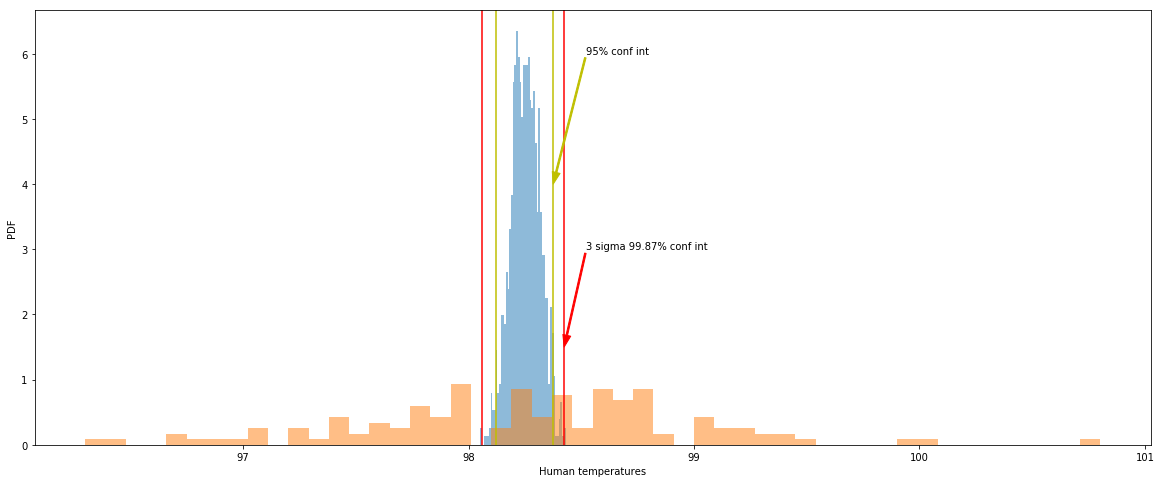

In [6]:
temp = df.temperature

bs_repeats = 1000
# Take bootstrap replicates of the mean: bs_replicates
bs_rep = np.empty(bs_repeats)
for i in range(bs_repeats):
    bs_rep[i] = np.mean(np.random.choice(temp, size=len(temp)))

# Compute and print SEM (standard Error of the Mean)
sem = np.std(temp) / np.sqrt(len(temp))
print('Standard error of the mean: {:.5f}'.format(sem))

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_rep)
print('Standard deviation of the means of all the replicates: {:.5f}'.format(bs_std))
# Make a histogram of the results
plt.rcParams["figure.figsize"] = (20,8)
_ = plt.hist(bs_rep, bins=50, density=True, alpha=0.5)
_ = plt.hist(temp, bins=50, density=True, alpha=0.5)
_ = plt.xlabel('Human temperatures')
_ = plt.ylabel('PDF')
     
ntl, ntu = np.percentile(bs_rep, [5,95])
nfl, nfu = np.percentile(bs_rep, [2.5,97.5])
nol, nou = np.percentile(bs_rep, [0.5,99.5])
tsl, tsu = np.percentile(bs_rep, [(100-(z_star*100)),z_star*100])

# confidence interval from percentiles of normed curve
print('90% Confidence interval: {}, margin of error: {:.3f}'.format([ntl, ntu], (ntu-ntl)/2))
print('95% Confidence interval: {}, margin of error: {:.3f}'.format([nfl, nfu], (nfu-nfl)/2))
print('99% Confidence interval: {}, margin of error: {:.3f}'.format([nol, nou], (nou-nol)/2))

print('3 sigma conf interval {:.2f}%: {}, margin of error: {:.3f}'.format((z_star*100),[tsl, tsu],(tsu-tsl)/2))

plt.axvline(x=nfl, color='y')
plt.axvline(x=nfu, color='y')
plt.annotate('95% conf int', xy=(nfu, 4), xytext=(98.52, 6), arrowprops={'color':'y', 'width':1.5, 'headwidth':8})           
# adds the word 'setosa at point 5.0, 3.5'
plt.axvline(x=tsl, color='r')
plt.axvline(x=tsu, color='r')
plt.annotate('3 sigma 99.87% conf int', xy=(tsu, 1.5), xytext=(98.52, 3), arrowprops={
    'color':'r', 'width':1.5, 'headwidth':8})

plt.show()


Notice how the Confidence interval of the mean doesn't include the majority of the actual sample and so can't be used to indicate abnormality of temperatures - its looking at the mean not the range. We need to use the prediction interval instead [see this notebook](https://github.com/ScottWPiraino/Springboard_Data_Science/blob/master/EDA/body_temp/ci_vs_pi.ipynb)

~~### Calculating directly from frequentist techniques~~ - this is CI of mean not prediction interval

In [67]:
temp = df.temperature
confidence_level = 0.95     # using the common 95% conf level
tail_2_ci = (1-confidence_level)/2
z_star = stats.norm.ppf(tail_2_ci)
print('z_star for 2 tail {}% confidence is:{:.3f}'.format(confidence_level*100, z_star))

sd = temp.std()
n = len(temp)
# margin of error
margin_of_error = z_star * sd / np.sqrt(n)
print('Margin of error: {:.5f}'.format(margin_of_error))

mean = temp.mean()
confidence_int = mean + np.array([-1, 1]) * margin_of_error
print('confidence interval is : {}'.format(confidence_int))

z_star for 2 tail 95.0% confidence is:-1.960
Margin of error: -0.12603
confidence interval is : [98.37526511 98.12319643]


In [53]:
individual_temp = 98.1
## Running the calculations using the internal scipy t-test functions
t1, pt1 = stats.ttest_1samp(temp, individual_temp)       # 1-sample two sided test
print("t = {:.8f}".format(t1))
print("pt = {:.8f}".format(pt1))

t = 2.32069237
pt = 0.02187268


~~By comparing this individuals p-value to a two tail 95% critical value (0.025), you will assume this individual has an abnormal temperature as 0.022 is smaller than 0.025.~~

~~If however you decide that 3 sigma or p-value = 1-0.9987 = 0.0013 is the better indicator of abnormal temperature you will conclude that this individual is not sick, as 0.022 is bigger than 0.0013 - here I didn't divide by 2 for a two tail test as perhaps you are only worried about this individual being abnormally cold.~~
- this is CI of mean not prediction interval

## Using a prediction interval to figure out abnormal temperature ranges

Using 2 tail 95% confidence interval and t statistics 

In [30]:
# t-based confidence interval
crit_t = stats.t.ppf(0.975, len(df.temperature) - 1)
temp_sem = df.temperature.std()/(np.sqrt(len(df.temperature)))
ci_width = crit_t * temp_sem
[cil, ciu] = df.temperature.mean() + np.array([-1, 1]) * ci_width
print('The 95% confidence interval for the mean of the population is     {:.5} to {:.5}'.format(cil,ciu))
print('This is not a good estimate for where abnormal temperatures falls as most of the sample are actually outside it.')

The 95% confidence interval for the mean of the population is     98.122 to 98.376
This is not a good estimate for where abnormal temperatures falls as most of the sample are actually outside it.


In [31]:
# t-based prediction interval 
pi_width = crit_t * df.temperature.std() * np.sqrt((1 + 1/(len(df.temperature))))
[pil, piu] = df.temperature.mean() + np.array([-1, 1]) * pi_width
print('The 95% prediction interval for the of the population is         {:.5} to {:.5}'.format(pil,piu))

The 95% prediction interval for the of the population is         96.793 to 99.705


In [106]:
# using https://stackoverflow.com/a/28243282/1215012 SO answer as guidance - and the single draw equation
[snl, snu] = stats.norm.interval(0.95, loc=df.temperature.mean(), scale=df.temperature.std(ddof=1))
print('The 95% prediction interval for the of the population is         {:.5} to {:.5}'.format(snl, snu))

The 95% prediction interval for the of the population is         96.812 to 99.686


/Users/alisonkline/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/alisonkline/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


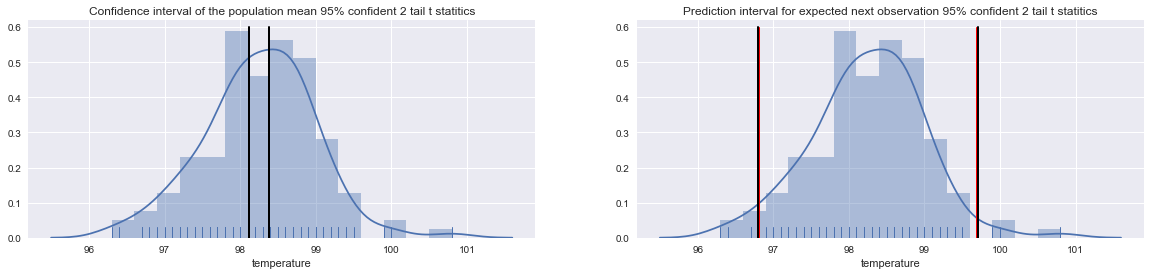

In [108]:
sns.set()
plt.rcParams["figure.figsize"] = (20,4)
fig, (ax1,ax2) = plt.subplots(1,2)
sns.distplot(df.temperature, bins = 15, rug = True, ax=ax1)
ax1.plot([cil,cil] , [0.6, 0], linewidth = 2, color = "k")
ax1.plot([ciu,ciu], [0.6, 0], linewidth = 2, color = "k")
ax1.set_title('Confidence interval of the population mean 95% confident 2 tail t statitics')

sns.distplot(df.temperature, bins = 15, rug = True, ax=ax2)
ax2.plot([pil,pil], [0.6, 0], linewidth = 2, color = "k")
ax2.plot([piu,piu], [0.6, 0], linewidth = 2, color = "k")
ax2.plot([snl,snl], [0.6, 0], linewidth = 1, color = "r")
ax2.plot([snu,snu], [0.6, 0], linewidth = 1, color = "r")
ax2.set_title('Prediction interval for expected next observation 95% confident 2 tail t statitics')
plt.show()

### Error discussion
Type 1 errors mean that we reject the null hypothesis when we should have kept it. In the case of testing a particular individual's temperature against 'normal temperatures' the H0 = Their temperature is x% confident to be in the normal range. If we reject H0 we may start to treat a healthy person.

If we make a Type II error we fail to reject the H0 when the person is really sick, and don't treat them - so they may get sicker!

Depending upon the treatment both errors could be bad!

## Q6. Is there a significant difference between males and females in normal temperature?
- What testing approach did you use and why?
- Write a story with your conclusion in the context of the original problem.

I'm going to complete a 2 sample hypothesis test using a t statistic as there are two independent samples males and females, we are interested in the difference of the mean of the populations.

- Null Hypothesis: The mean temperatures of Males and Female humans are the same  $\mu_M - \mu_F = 0$
- Alt hypothesis: There is a difference in the population means $\mu_M - \mu_F \neq 0$
- Setting alpha= 0.05 as I want to be 95% confidence in my conclusion

we have 65 observations of men, and 65 observations of women


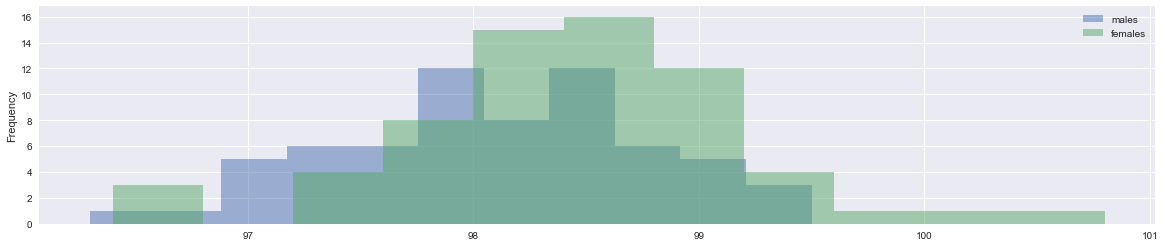

In [48]:
temp_males = df.loc[df.gender == 'M', 'temperature']
temp_females = df.loc[df.gender == 'F', 'temperature']
n = len(temp_males)
m = len(temp_females)
print('we have {} observations of men, and {} observations of women'.format(n,m))

temp_males.plot(kind='hist', bins=11, alpha=0.5, label='males')
temp_females.plot(kind='hist', bins=11, alpha=0.5, label='females')
plt.legend()
plt.show()

Assumption checking:
 - our sample has been randomly chosen
 - n is larger than 30 for both populations so assuming normal
 - independence our samples are less than 10% of the population of humans

In [102]:
# Assuming the null hypothesis means we can combine both groups
var_m = np.var(temp_males, ddof=1)
var_f =np.var(temp_females, ddof=1)
sd_combined = np.sqrt(var_m/n+var_f/m)

test_stat = (np.mean(temp_males) - np.mean(temp_females))/sd_combined
print('variance of males = {:.7}, \nvariance of females = {:.7}'.format(np.var(temp_males), np.var(temp_females)))

# at 95% two tail alpha=0.05 giving 0.025 in each tail and an area to left of crit_t of 0.975
ddof = (var_m/n+var_f/m)**2 / ((var_m/n)**2/(n-1) + (var_f/m)**2/(m-1))
#dof = (avar/na + bvar/nb)**2 / (avar**2/(na**2*adof) + bvar**2/(nb**2*bdof))
crit_t = stats.t.ppf(0.975, ddof)
print('degrees of freedom : {:.5}'.format(ddof))

print('Test_statistic  = {:.7}, \nthe test critical value is {:.7}'.format(test_stat, crit_t))

p_val = 2*stats.t.sf(abs(test_stat), df=ddof)
print('p value of this Test statistic: {:.7}'.format(p_val))

if p_val > 0.05:
    print("\nSample indicates that the two population's mean are the same (fail to reject H0)")
else:
    print("\nSample does not indicate that the two population's mean are equal (reject H0) with 95% confidence")

variance of males = 0.4807479, 
variance of females = 0.5442698
degrees of freedom : 127.51
Test_statistic  = -2.285435, 
the test critical value is 1.978743
p value of this Test statistic: 0.02393826

Sample does not indicate that the two population's mean are equal (reject H0) with 95% confidence


In [91]:
t, pt = stats.ttest_ind(temp_males, temp_females, equal_var = False)       # 2-sample two sided test from samples
print('calculated t-statistic: {:.7}'.format(t))
print('with p value: {:.7}'.format(pt))

calculated t-statistic: -2.285435
with p value: 0.02393826


In [100]:
mean_m = np.mean(temp_males)
mean_f = np.mean(temp_females)

# 2-sample two sided test from sample statistics only
t2,pt2 = stats.ttest_ind_from_stats(mean_m, np.sqrt(var_m), n, mean_f, np.sqrt(var_f), m, equal_var=False)
print('calculated t-statistic: {:.7}'.format(t2))
print('with p value: {:.7}'.format(pt2))

calculated t-statistic: -2.285435
with p value: 0.02393826
